# TOPIC MODELLING ON NIPS PAPERS - KAGGLE

Topic Modelling of ML Papers using LDA (Latent Dirichlet Allocation)

https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated/tasks?taskId=2960

### Library Imports

In [1]:
import numpy as np
import pandas as pd

### Load the datasets and verify the data load

In [2]:
authors = pd.read_csv("D:\\ML-Datasets\\Kaggle\\NIPS\\authors.csv")

authors.head()

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN


In [3]:
# A quick look on the data structure and missing values

authors.info()

authors.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30237 entries, 0 to 30236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    30237 non-null  int64 
 1   first_name   30236 non-null  object
 2   last_name    30234 non-null  object
 3   institution  17303 non-null  object
dtypes: int64(1), object(3)
memory usage: 945.0+ KB


source_id          0
first_name         1
last_name          3
institution    12934
dtype: int64

In [4]:
# Load the papers dataset

papers = pd.read_csv("D:\\ML-Datasets\\Kaggle\\NIPS\\papers.csv")

papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [5]:
# A quick look on the papers data structure and missing values by columns

papers.info()

papers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source_id  9680 non-null   int64 
 1   year       9680 non-null   int64 
 2   title      9680 non-null   object
 3   abstract   6361 non-null   object
 4   full_text  9677 non-null   object
dtypes: int64(2), object(3)
memory usage: 378.2+ KB


source_id       0
year            0
title           0
abstract     3319
full_text       3
dtype: int64

Since we would be doing topic modelling on full_text column, we would need to perform missing value treatment there
We would replace the null values with the corresponding title

In [6]:
# Check the missing full_text rows

papers[papers['full_text'].isna()] 

,source_id,year,title,abstract,full_text
4481,5218,2012,A dynamic excitatory-inhibitory network in a V...,NaN,NaN
4686,5219,2012,An Integer Optimization Approach to Associativ...,NaN,NaN
6211,1017,2016,Only H is left: Near-tight Episodic PAC RL,In many applications such as advertisement pla...,NaN


In [7]:
# perform the missing imputations on both full_text and abstract

papers['full_text'] = np.where(papers['full_text'].isna(), papers['title'], papers['full_text'])
papers['abstract'] = np.where(papers['abstract'].isna(), papers['title'], papers['abstract'])

# alternative approach - using lambda expression
# papers['full_text'] = papers.apply(lambda x: x['title'] if pd.isnull(x['full_text']) else x['full_text'], axis=1)

In [8]:
papers.isna().sum()

source_id    0
year         0
title        0
abstract     0
full_text    0
dtype: int64

### Preprocessing

#### Task: Use TF-IDF Vectorization to create a vectorized document term matrix. We may want to explore the max_df and min_df parameters.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')
dtm = tfidf.fit_transform(papers['title'])

dtm

<9680x3397 sparse matrix of type '<class 'numpy.float64'>'
	with 57450 stored elements in Compressed Sparse Row format>

### Latent Drichilet Allocation

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=7, random_state=101)

# This can take a while, we are dealing with large number of documents here
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=101)

In [11]:
# Check the shape of the numpy array - This matches with 10 components which we wanted and columns equal to the sparse matrix
LDA.components_.shape

(7, 3397)

#### Now we will setup a loop which will print out the top 10 words with highest probabilities for all the ten topics

In [12]:
for index, topic in enumerate(LDA.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{index}")
    list_keywords = [tfidf.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(list_keywords)
    print("\n")

THE TOP 15 WORDS FOR TOPIC #0
['deep', 'network', 'using', 'speech', 'object', 'image', 'networks', 'recognition', 'neural', 'learning']


THE TOP 15 WORDS FOR TOPIC #1
['efficient', 'optimal', 'metric', 'sparse', 'task', 'kernel', 'boosting', 'reinforcement', 'multi', 'learning']


THE TOP 15 WORDS FOR TOPIC #2
['submodular', 'reduction', 'minimization', 'classification', 'analysis', 'adversarial', 'semi', 'bounds', 'supervised', 'learning']


THE TOP 15 WORDS FOR TOPIC #3
['visual', 'regression', 'model', 'process', 'models', 'processes', 'markov', 'gaussian', 'decision', 'learning']


THE TOP 15 WORDS FOR TOPIC #4
['stochastic', 'online', 'gradient', 'recurrent', 'policy', 'network', 'optimization', 'learning', 'networks', 'neural']


THE TOP 15 WORDS FOR TOPIC #5
['time', 'data', 'stochastic', 'rank', 'learning', 'variational', 'matrix', 'estimation', 'inference', 'models']


THE TOP 15 WORDS FOR TOPIC #6
['models', 'spiking', 'search', 'neurons', 'model', 'deep', 'memory', 'neural

In [13]:
# Now we will attach the topic numbers to the original articles

# In order to do this, we would need to apply the transform method on our LDA model and DTM to associate the topic to each
# article
topic_results = LDA.transform(dtm)

# Now we will check the shape
topic_results.shape

(9680, 7)

In [14]:
# If we check the first element, we will get the probabilities of each of the articles belonging to one of the 7 topics
topic_results[0]

array([0.05072517, 0.05017318, 0.05022285, 0.0502368 , 0.6981991 ,
       0.05017391, 0.05026899])

There is a 69% probability, that it should belong to the 5th topic

In [15]:
# We will grab the index position of the highest probability
topic_results[0].argmax()

4

In [16]:
# Associating topic to each of the documents

papers['Topic'] = topic_results.argmax(axis=1)

papers.head(10)

,source_id,year,title,abstract,full_text,Topic
0,27,1987,Bit-Serial Neural Networks,Bit-Serial Neural Networks,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...,4
1,63,1987,Connectivity Versus Entropy,Connectivity Versus Entropy,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...,1
2,60,1987,The Hopfield Model with Multi-Level Neurons,The Hopfield Model with Multi-Level Neurons,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...,6
3,59,1987,How Neural Nets Work,How Neural Nets Work,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...,3
4,69,1987,Spatial Organization of Neural Networks: A Pro...,Spatial Organization of Neural Networks: A Pro...,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...,4
5,6,1987,A Neural-Network Solution to the Concentrator ...,A Neural-Network Solution to the Concentrator ...,775 \n\nA NEURAL-NETWORK SOLUTION TO THE C...,0
6,33,1987,LEARNING BY STATE RECURRENCE DETECTION,LEARNING BY STATE RECURRENCE DETECTION,642 \n\nLEARNING BY ST ATE RECURRENCE DETECfIO...,1
7,36,1987,Stability Results for Neural Networks,Stability Results for Neural Networks,554 \n\nSTABILITY RESULTS FOR NEURAL NETWORK...,4
8,35,1987,Introduction to a System for Implementing Neur...,Introduction to a System for Implementing Neur...,804 \n\nINTRODUCTION TO A SYSTEM FOR IMPLEMEN...,4
9,19,1987,Optimization with Artificial Neural Network Sy...,Optimization with Artificial Neural Network Sy...,474 \n\nOPTIMIZA nON WITH ARTIFICIAL NEURAL NE...,4


2    1665
0    1511
5    1419
4    1397
1    1277
6    1220
3    1191
Name: Topic, dtype: int64

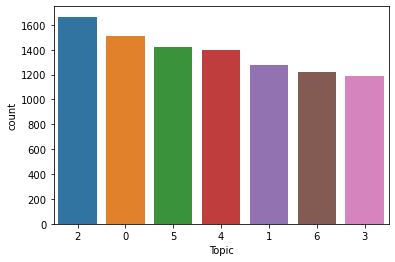

In [17]:
import seaborn as sns

sns.countplot(x = 'Topic',
              data = papers,
              order = papers['Topic'].value_counts().index)

papers['Topic'].value_counts().sort_values(ascending=False)